<a href="https://colab.research.google.com/github/hidt4/python-compchem-book/blob/main/compchem_book_ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5章 量子化学計算の基礎について理解を深めよう

### 環境構築

#### Google Colab上にPsi4をインストール

In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y psi4=1.8 python=3.10 -c conda-forge/label/libint_dev -c conda-forge
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages')

--2024-06-05 12:24:24--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.176.84, 104.18.177.84, 2606:4700::6812:b154, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.176.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2024-06-05 12:24:25--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 137.15M   222MB/s    in 0.6s    

2024-06-05 12:24:25 (222 MB/s) - ‘Minicond

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import psi4

print(f'current time: {datetime.datetime.now()}')
print(f'python version:\n{sys.version}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'psi4 version: {psi4.__version__}')

current time: 2024-06-05 12:27:01.649736
python version:
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy version: 1.25.2
pandas version: 2.0.3
psi4 version: 1.8.2


#### 必要なライブラリと関数の定義

In [ ]:
# 振動数可視化のためのライブラリ
!pip install py3Dmol
import py3Dmol

!git clone https://github.com/duerrsimon/normal-mode-jupyter.git
sys.path.append('/content/normal-mode-jupyter')
from helpers import show_normal_modes

  Obtaining dependency information for py3Dmol from https://files.pythonhosted.org/packages/47/69/b295c4c0f7c9e9ddbb3f94577c0b15ddedb4dbbf08a451bdac5d0f5d4831/py3Dmol-2.0.3-py2.py3-none-any.whl.metadata
Cloning into 'normal-mode-jupyter'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 8), reused 17 (delta 4), pack-reused 0
Receiving objects: 100% (23/23), 801.96 KiB | 19.09 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
def show_3D(mol: psi4.core.Molecule) -> py3Dmol.view:
    """
    Psi4のMoleculeオブジェクトをpy3Dmolで描画する
    Args:
        mol: 描画対象の分子

    Returns:
        py3Dmol.view: py3Dmolの描画オブジェクト

    """
    view = py3Dmol.view(width=400, height=400)
    xyz = mol.save_string_xyz_file()
    view.addModel(xyz, 'xyz')
    view.setStyle({'stick': {}})
    view.setBackgroundColor('#e1e1e1')
    view.zoomTo()

    return view.show()

#### 計算資源の設定

In [ ]:
# 計算資源の確認（CPU, RAM）
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!cat /proc/meminfo

MemTotal:       53474556 kB
MemFree:        38242068 kB
MemAvailable:   51741444 kB
Buffers:          486480 kB
Cached:         13147544 kB
SwapCached:            0 kB
Active:          1022000 kB
Inactive:       13400496 kB
Active(anon):       1132 kB
Inactive(anon):   789104 kB
Active(file):    1020868 kB
Inactive(file): 12611392 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             87116 kB
Writeback:             0 kB
AnonPages:        785956 kB
Mapped:           452380 kB
Shmem:              1764 kB
KReclaimable:     495876 kB
Slab:             582648 kB
SReclaimable:     495876 kB
SUnreclaim:        86772 kB
KernelStack:        6192 kB
PageTables:        18544 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    26737276 kB
Committed_AS:    2949092 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10224 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
n_cpu = os.cpu_count()
ram = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES') / (1024 ** 3)

In [ ]:
# 環境に応じて計算資源を設定
psi4.set_num_threads(n_cpu)
psi4.set_memory(f'{ram * 0.9: .0f}GB')

46000000000

### 5.3 Psi4のログファイルを見てみよう

In [ ]:
# 水分子の構造定義
h2o = psi4.geometry('''
0 1
O       -0.1176269719      0.7387773605      0.0000000000
H        0.8523730281      0.7387773605      0.0000000000
H       -0.4409567836      1.4770262439     -0.5397651517
''')

#### 計算レベルを変える

In [ ]:
# HF/STO-3G
psi4.set_output_file('HF_STO-3G.log')
psi4.energy('hf/sto-3g', molecule=h2o)

# MP2/STO-3G
psi4.set_output_file('MP2_STO-3G.log')
psi4.energy('mp2/sto-3g', molecule=h2o)

# B3LYP/STO-3G
psi4.set_output_file('B3LYP_STO-3G.log')
psi4.energy('b3lyp/sto-3g', molecule=h2o)

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=sto-3g, molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -74.96172843126853
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=sto-3g, molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -74.99758548366502
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=sto-3g, molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -75.31258708893361


-75.31258708893361

#### 基底関数系を変える

In [ ]:
# HF/6-31G
psi4.set_output_file('HF_6-31G.log')
psi4.energy('hf/6-31g', molecule=h2o)

# HF/6-31G(d)
psi4.set_output_file('HF_6-31Gd.log')
psi4.energy('hf/6-31g(d)', molecule=h2o)

# HF/6-31G(d,p)
psi4.set_output_file('HF_6-31Gdp.log')
psi4.energy('hf/6-31g(d,p)', molecule=h2o)

# HF/6-311G
psi4.set_output_file('HF_6-311G.log')
psi4.energy('hf/6-311g', molecule=h2o)

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=6-31g, molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -75.98450767927737
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=6-31g(d), molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -76.00905417707659
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=6-31g(d,p), molecule=default, nre=9.062772525153836
INFO:psi4.driver.driver:Return energy(): -76.0215414605514
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf

-76.00974474136169

### 5.4 適切な計算レベルを選択することの大切さを知ろう

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.style.use('seaborn-v0_8-poster')
mpl.style.use('seaborn-v0_8-whitegrid')

In [ ]:
from itertools import product

#### 塩化ナトリウムの計算

In [ ]:
def calc_energies(level: str, geom: str, range: np.ndarray) -> list[float]:
    """
    指定範囲内で分子を定義し，指定レベルでエネルギー計算を行う
    Args:
        level: 計算レベル
        geom: 空白入りの分子座標
        range: 計算を実行する範囲

    Returns:
        list[float]: エネルギー値のリスト

    """
    energies = []
    for distance in range:
        mol = psi4.geometry(geom.format(distance))
        energy = psi4.energy(level, molecule=mol)
        energies.append(energy)

    return energies

In [ ]:
NaCl_geom = '''
0 1
Na  0   0   0
Cl  0   0   {}
'''

methods = ['hf', 'mp2', 'b3lyp']
basis_sets = ['sto-3g', 'cc-pvdz', 'cc-pvtz', 'aug-cc-pvtz']
df_NaCl = pd.DataFrame()

In [ ]:
psi4.set_output_file('NaCl.log')

PosixPath('NaCl.log')

In [ ]:
for (method, basis_set) in product(methods, basis_sets):
    level = method + '/' + basis_set
    df_NaCl[level] = calc_energies(level=level,
                                   geom=NaCl_geom,
                                   range=np.arange(1.0, 4.0, 0.1))

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=sto-3g, molecule=default, nre=98.95613839529
INFO:psi4.driver.driver:Return energy(): -612.0561319506969
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=sto-3g, molecule=default, nre=89.96012581389998
INFO:psi4.driver.driver:Return energy(): -612.7287881119507
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=sto-3g, molecule=default, nre=82.46344866274165
INFO:psi4.driver.driver:Return energy(): -613.2474643663606
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis

In [ ]:
df_NaCl.head().round(3)

,hf/sto-3g,hf/cc-pvdz,hf/cc-pvtz,hf/aug-cc-pvtz,mp2/sto-3g,mp2/cc-pvdz,mp2/cc-pvtz,mp2/aug-cc-pvtz,b3lyp/sto-3g,b3lyp/cc-pvdz,b3lyp/cc-pvtz,b3lyp/aug-cc-pvtz
0,-612.056,-619.248,-619.423,-619.447,-612.099,-619.411,-619.729,-619.766,-613.106,-620.467,-620.638,-620.659
1,-612.729,-619.874,-619.988,-620.002,-612.772,-620.038,-620.287,-620.320,-613.778,-621.092,-621.202,-621.216
2,-613.247,-620.303,-620.378,-620.386,-613.289,-620.466,-620.668,-620.699,-614.288,-621.518,-621.590,-621.597
3,-613.644,-620.619,-620.672,-620.676,-613.685,-620.779,-620.952,-620.983,-614.673,-621.827,-621.878,-621.881
4,-613.935,-620.860,-620.901,-620.903,-613.977,-621.016,-621.170,-621.202,-614.955,-622.058,-622.097,-622.099


<Axes: >

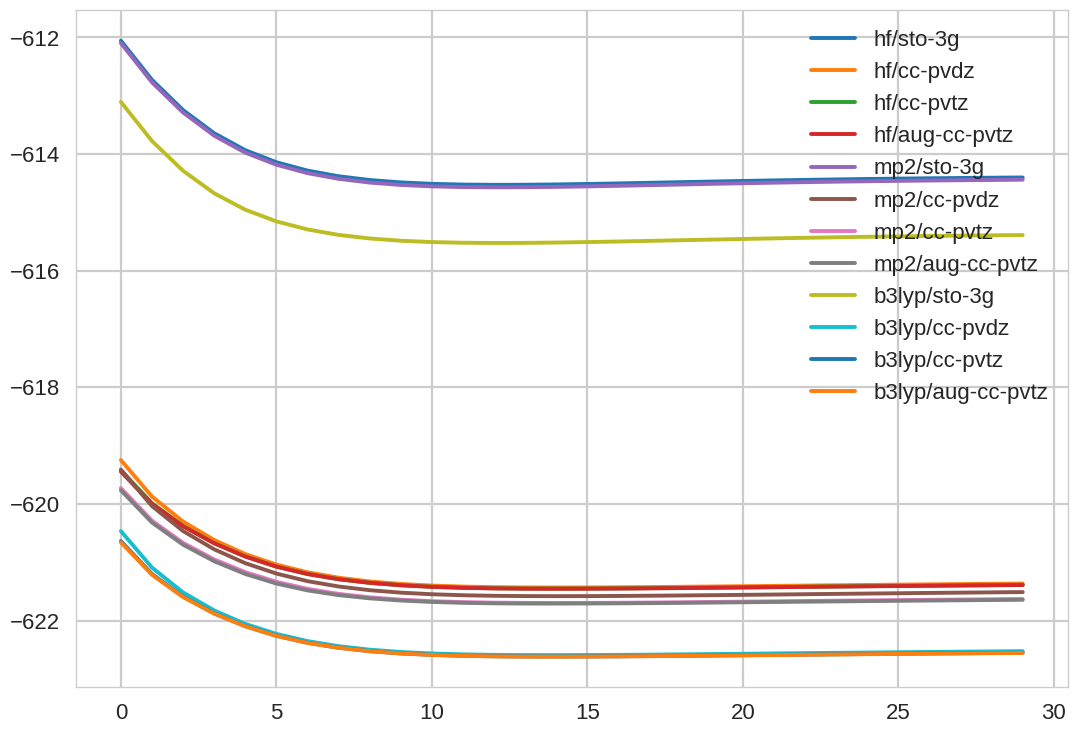

In [ ]:
df_NaCl.plot()

##### グラフの作成

In [ ]:
x = np.arange(1.0, 4.0, 0.1)
fs = 24

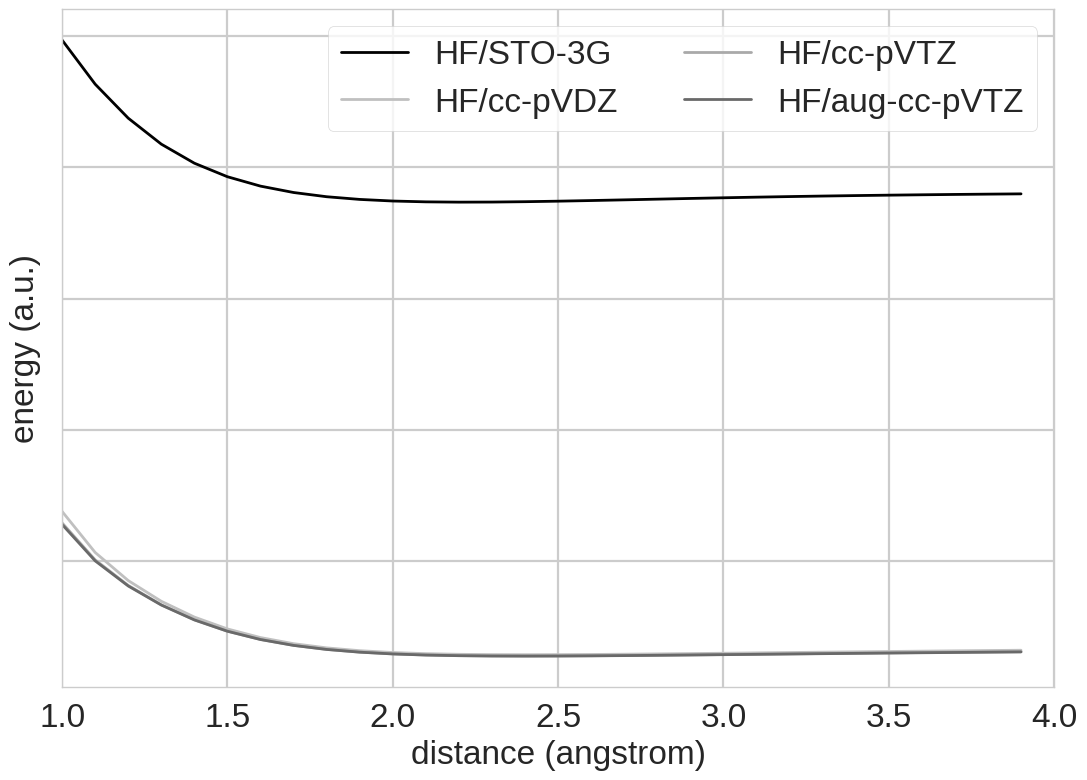

In [ ]:
# HF
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, df_NaCl['hf/sto-3g'], color='black', lw=2, label='HF/STO-3G')
ax.plot(x, df_NaCl['hf/cc-pvdz'], color='silver', lw=2, label='HF/cc-pVDZ')
ax.plot(x, df_NaCl['hf/cc-pvtz'], color='darkgray', lw=2, label='HF/cc-pVTZ')
ax.plot(x, df_NaCl['hf/aug-cc-pvtz'], color='dimgray', lw=2, label='HF/aug-cc-pVTZ')

ax.set_xlim(1.0, 4.0)
ax.set_xticks(np.arange(1.0, 4.1, 0.5))
ax.set_xticklabels(np.arange(1.0, 4.1, 0.5), fontsize=fs)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=fs)
ax.set_ylabel('energy (a.u.)', size=fs)

ax.legend(fontsize=fs, ncol=2, frameon=True)
fig.savefig('NaCl_HF_24.png', dpi=600, transparent=True)

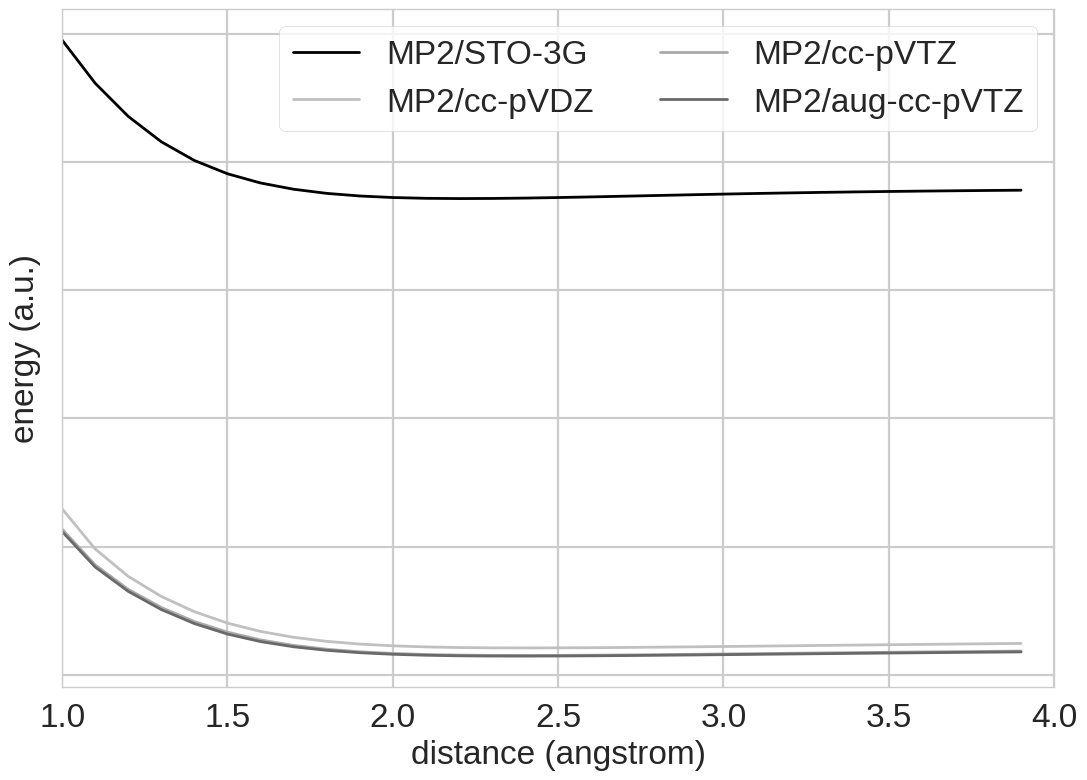

In [ ]:
# MP2
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, df_NaCl['mp2/sto-3g'], color='black', lw=2, label='MP2/STO-3G')
ax.plot(x, df_NaCl['mp2/cc-pvdz'], color='silver', lw=2, label='MP2/cc-pVDZ')
ax.plot(x, df_NaCl['mp2/cc-pvtz'], color='darkgray', lw=2, label='MP2/cc-pVTZ')
ax.plot(x, df_NaCl['mp2/aug-cc-pvtz'], color='dimgray', lw=2, label='MP2/aug-cc-pVTZ')

ax.set_xlim(1.0, 4.0)
ax.set_xticks(np.arange(1.0, 4.1, 0.5))
ax.set_xticklabels(np.arange(1.0, 4.1, 0.5), fontsize=fs)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=fs)
ax.set_ylabel('energy (a.u.)', size=fs)

ax.legend(fontsize=fs, ncol=2, frameon=True)
fig.savefig('NaCl_MP2_24.png', dpi=600, transparent=True)

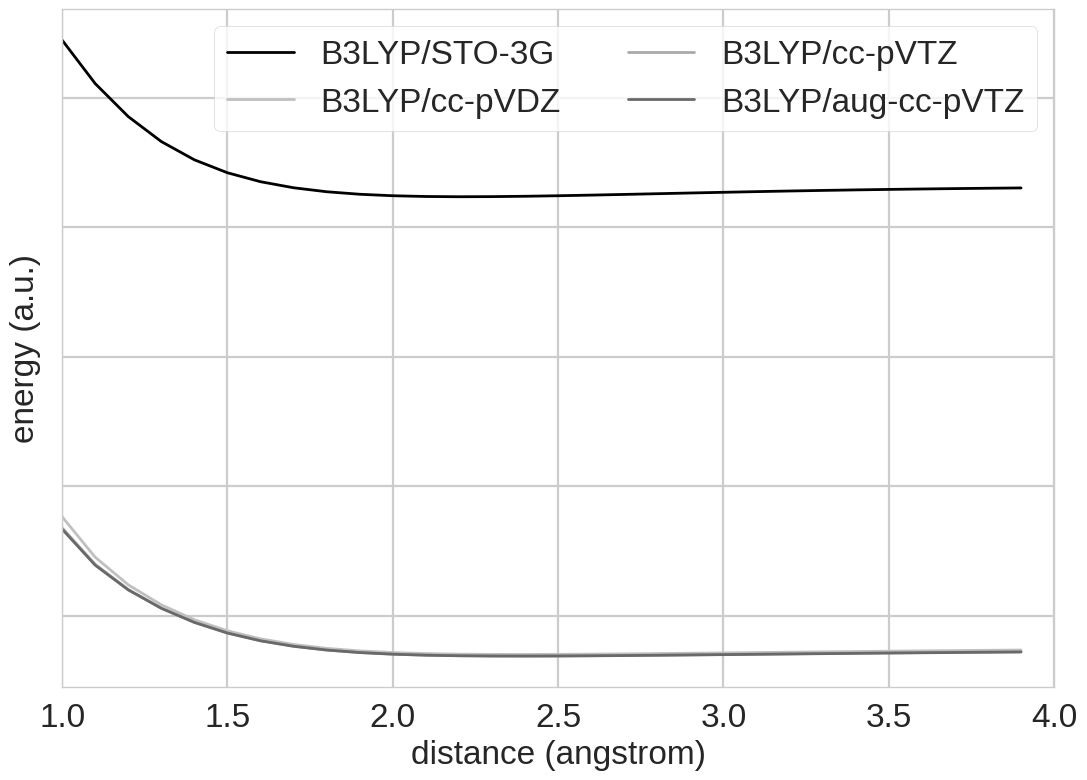

In [ ]:
# B3LYP
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, df_NaCl['b3lyp/sto-3g'], color='black', lw=2, label='B3LYP/STO-3G')
ax.plot(x, df_NaCl['b3lyp/cc-pvdz'], color='silver', lw=2, label='B3LYP/cc-pVDZ')
ax.plot(x, df_NaCl['b3lyp/cc-pvtz'], color='darkgray', lw=2, label='B3LYP/cc-pVTZ')
ax.plot(x, df_NaCl['b3lyp/aug-cc-pvtz'], color='dimgray', lw=2, label='B3LYP/aug-cc-pVTZ')

ax.set_xlim(1.0, 4.0)
ax.set_xticks(np.arange(1.0, 4.1, 0.5))
ax.set_xticklabels(np.arange(1.0, 4.1, 0.5), fontsize=fs)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=fs)
ax.set_ylabel('energy (a.u.)', size=fs)

ax.legend(fontsize=fs, ncol=2, frameon=True)
fig.savefig('NaCl_B3LYP_24.png', dpi=600, transparent=True)

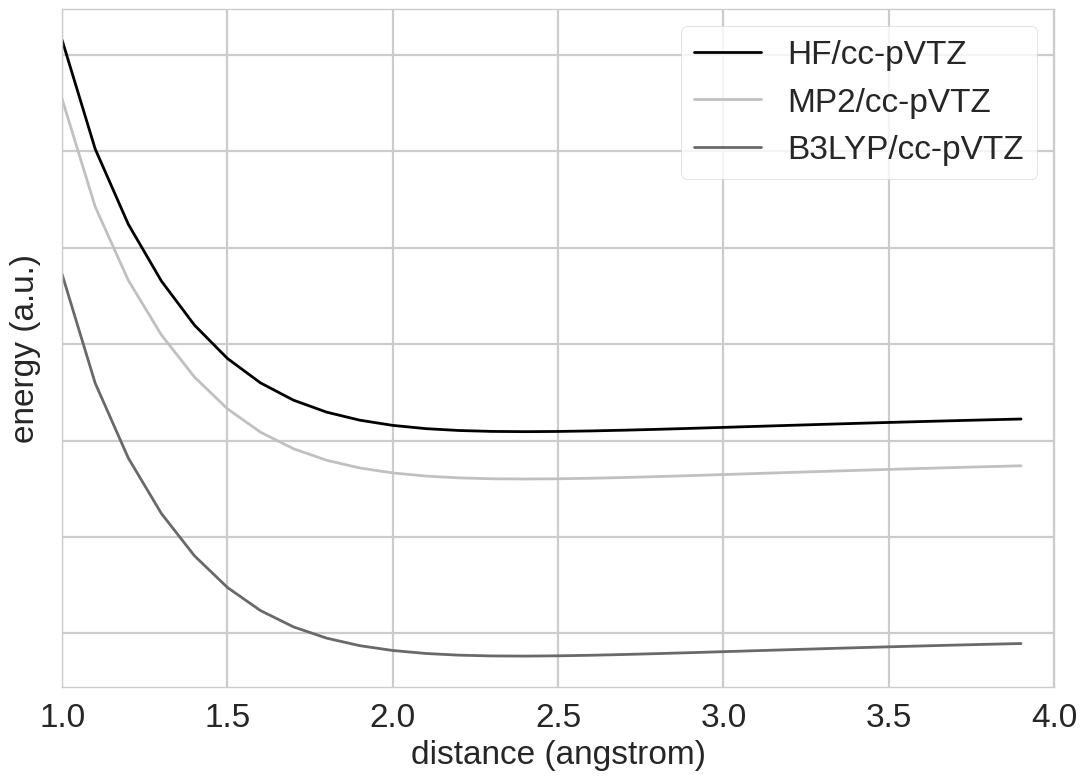

In [ ]:
## cc-pVTZ
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, df_NaCl['hf/cc-pvtz'], color='black', lw=2, label='HF/cc-pVTZ')
ax.plot(x, df_NaCl['mp2/cc-pvtz'], color='silver', lw=2, label='MP2/cc-pVTZ')
ax.plot(x, df_NaCl['b3lyp/cc-pvtz'], color='dimgray', lw=2, label='B3LYP/cc-pVTZ')

ax.set_xlim(1.0, 4.0)
ax.set_xticks(np.arange(1.0, 4.1, 0.5))
ax.set_xticklabels(np.arange(1.0, 4.1, 0.5), fontsize=fs)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=fs)
ax.set_ylabel('energy (a.u.)', size=fs)

ax.legend(fontsize=fs, frameon=True)
fig.savefig('NaCl_cc-pVTZ_24.png', dpi=600, transparent=True)

##### エネルギー極小値を求める

In [ ]:
def get_minima(theory: str,
               geom: str,
               distance_min: float,
               distance_max: float) -> float:
    """
    探索範囲内でエネルギー最小値を与える原子間距離を求める。

    Args:
        theory: 計算レベル
        geom: 計算対象分子の構造
        distance_min: 探索する最短原子間距離
        distance_max: 探索する最長原子間距離

    Returns:
        float: エネルギー最小値を与える原子間距離
    """
    from scipy import optimize

    level = f'{theory}/cc-pvtz'


    def object_function(length: float) -> float:
        """
        最小化する目的関数。指定原子間距離でエネルギー計算を行う。

        Args:
            length: 原子間距離
        Returns:
            float: エネルギー値
        """
        mol = psi4.geometry(geom.format(length))
        energy = psi4.energy(level, molecule=mol)

        return energy


    distance = optimize.fminbound(object_function,
                                  x1=distance_min,
                                  x2=distance_max)

    return distance

In [ ]:
psi4.set_output_file('NaCl_minima.log')

PosixPath('NaCl_minima.log')

In [ ]:
for method in methods:
    dist = get_minima(method, NaCl_geom, 1.0, 4.0)
    print(f'{method.upper()}/cc-pVTZ: {dist: .2f} angstrom')

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=cc-pvtz, molecule=default, nre=46.1140915546428
INFO:psi4.driver.driver:Return energy(): -621.443262228078
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=cc-pvtz, molecule=default, nre=34.671549778342104
INFO:psi4.driver.driver:Return energy(): -621.4390120123031
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf, basis=cc-pvtz, molecule=default, nre=57.929932435234306
INFO:psi4.driver.driver:Return energy(): -621.2967104935007
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=hf,

HF/cc-pVTZ:  2.40 angstrom


INFO:psi4.driver.driver:Return energy(): -621.6889912516524
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=34.671549778342104
INFO:psi4.driver.driver:Return energy(): -621.6840444197067
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=57.929932435234306
INFO:psi4.driver.driver:Return energy(): -621.5483833346179
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=39.77645004818434
INFO:psi4.driver.driver:Return energy(): -621.6983738264526
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_

MP2/cc-pVTZ:  2.40 angstrom


INFO:psi4.driver.driver:Return energy(): -622.6086771127611
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=34.671549778342104
INFO:psi4.driver.driver:Return energy(): -622.6020269838888
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=57.929932435234306
INFO:psi4.driver.driver:Return energy(): -622.4719597037584
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=39.84898681198513
INFO:psi4.driver.driver:Return energy(): -622.6164481044297
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'fun

B3LYP/cc-pVTZ:  2.38 angstrom


#### アルゴン二量体の計算

In [ ]:
Ar2_geom = '''
0 1
Ar  0   0   0
Ar  0   0   {}
'''

methods = ['mp2', 'b3lyp', 'b3lyp-d3bj', 'wb97x-d']
df_ar2 = pd.DataFrame()

In [ ]:
psi4.set_output_file('Ar2.log')

PosixPath('Ar2.log')

In [ ]:
for method in methods:
    level = method + '/cc-pvtz'
    df_ar2[method] = calc_energies(level=level,
                                   geom=Ar2_geom,
                                   range=np.arange(1.5, 5.5, 0.1))

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=114.30227750472
INFO:psi4.driver.driver:Return energy(): -1053.276222909868
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=107.15838516067498
INFO:psi4.driver.driver:Return energy(): -1053.4891892193993
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=100.8549507394588
INFO:psi4.driver.driver:Return energy(): -1053.650720514536
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=

In [ ]:
df_ar2.round(2)

,mp2,b3lyp,b3lyp-d3bj,wb97x-d
0,-1053.28,-1054.30,-1054.30,-1054.27
1,-1053.49,-1054.51,-1054.51,-1054.48
2,-1053.65,-1054.67,-1054.67,-1054.64
3,-1053.77,-1054.79,-1054.79,-1054.76
4,-1053.86,-1054.88,-1054.88,-1054.85
5,-1053.93,-1054.95,-1054.95,-1054.92
6,-1053.98,-1054.99,-1055.00,-1054.97
7,-1054.02,-1055.03,-1055.03,-1055.00
8,-1054.04,-1055.06,-1055.06,-1055.03
9,-1054.06,-1055.07,-1055.08,-1055.05


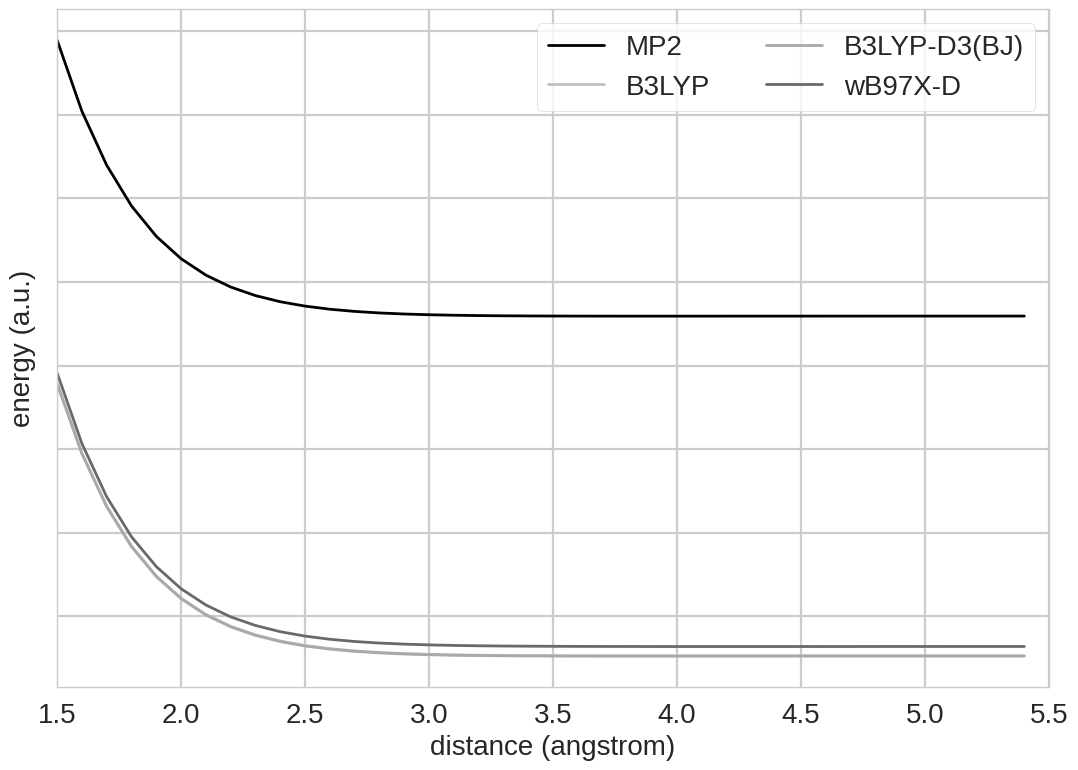

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(1.5, 5.5, 0.1), df_ar2['mp2'], '-', color='black',linewidth=2, label='MP2')
ax.plot(np.arange(1.5, 5.5, 0.1), df_ar2['b3lyp'], '-', color='silver', linewidth=2, label='B3LYP')
ax.plot(np.arange(1.5, 5.5, 0.1), df_ar2['b3lyp-d3bj'], '-', color='darkgray', linewidth=2, label='B3LYP-D3(BJ)')
ax.plot(np.arange(1.5, 5.5, 0.1), df_ar2['wb97x-d'], '-', color='dimgray', linewidth=2, label='wB97X-D')

ax.set_xlim(1.5, 5.5)
ax.set_xticks(np.arange(1.5, 5.6, 0.5))
ax.set_xticklabels(np.arange(1.5, 5.6, 0.5), fontsize=20)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=20)
ax.set_ylabel('energy (a.u.)', size=20)
ax.legend(fontsize=20, ncol=2, frameon=True)
fig.savefig('Ar2_energy_20.png', dpi=600, transparent=True)

##### エネルギー極小値を求める

In [ ]:
psi4.set_output_file('Ar2_minima.log')

In [ ]:
for method in methods:
    dist = get_minima(method, Ar2_geom, 1.5, 5.5)
    print(f'{method.upper()}/cc-pVTZ: {dist: .2f} angstrom')

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=56.62520301734889
INFO:psi4.driver.driver:Return energy(): -1054.0984261281383
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=43.16403521920693
INFO:psi4.driver.driver:Return energy(): -1054.102101635735
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=37.634690409507826
INFO:psi4.driver.driver:Return energy(): -1054.1019968957617
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): meth

MP2/cc-pVTZ:  3.93 angstrom


INFO:psi4.driver.driver:Return energy(): -1055.11435265994
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=43.16403521920693
INFO:psi4.driver.driver:Return energy(): -1055.1186081847782
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=37.634690409507826
INFO:psi4.driver.driver:Return energy(): -1055.1186980009477
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp, basis=cc-pvtz, molecule=default, nre=39.95705183837342
INFO:psi4.driver.driver:Return energy(): -1055.1186756097704
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'fu

B3LYP/cc-pVTZ:  5.50 angstrom


INFO:psi4.driver.driver:Return energy(): -1055.1156386999405
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp-d3bj, basis=cc-pvtz, molecule=default, nre=43.16403521920693
INFO:psi4.driver.driver:Return energy(): -1055.119154164778
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp-d3bj, basis=cc-pvtz, molecule=default, nre=37.634690409507826
INFO:psi4.driver.driver:Return energy(): -1055.1189577409477
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=b3lyp-d3bj, basis=cc-pvtz, molecule=default, nre=40.816470612783434
INFO:psi4.driver.driver:Return energy(): -1055.1190741382877
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLER

B3LYP-D3BJ/cc-pVTZ:  3.80 angstrom


INFO:psi4.driver.driver:Return energy(): -1055.0861944452195
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=wb97x-d, basis=cc-pvtz, molecule=default, nre=43.16403521920693
INFO:psi4.driver.driver:Return energy(): -1055.0905662675043
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=wb97x-d, basis=cc-pvtz, molecule=default, nre=37.634690409507826
INFO:psi4.driver.driver:Return energy(): -1055.0905439810956
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=wb97x-d, basis=cc-pvtz, molecule=default, nre=40.26918857979163
INFO:psi4.driver.driver:Return energy(): -1055.0905943559446
INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e

WB97X-D/cc-pVTZ:  4.18 angstrom


In [ ]:
psi4.energy('mp2/cc-pvtz', molecule=psi4.geometry(Ar2_geom.format(3.934)))

INFO:psi4.driver.task_planner:PLANNING Atomic:  keywords={'SCF__INTS_TOLERANCE': 1e-12, 'function_kwargs': {}}
INFO:psi4.driver.driver:Compute energy(): method=mp2, basis=cc-pvtz, molecule=default, nre=43.58246473235384
INFO:psi4.driver.driver:Return energy(): -1054.102102633933


-1054.102102633933

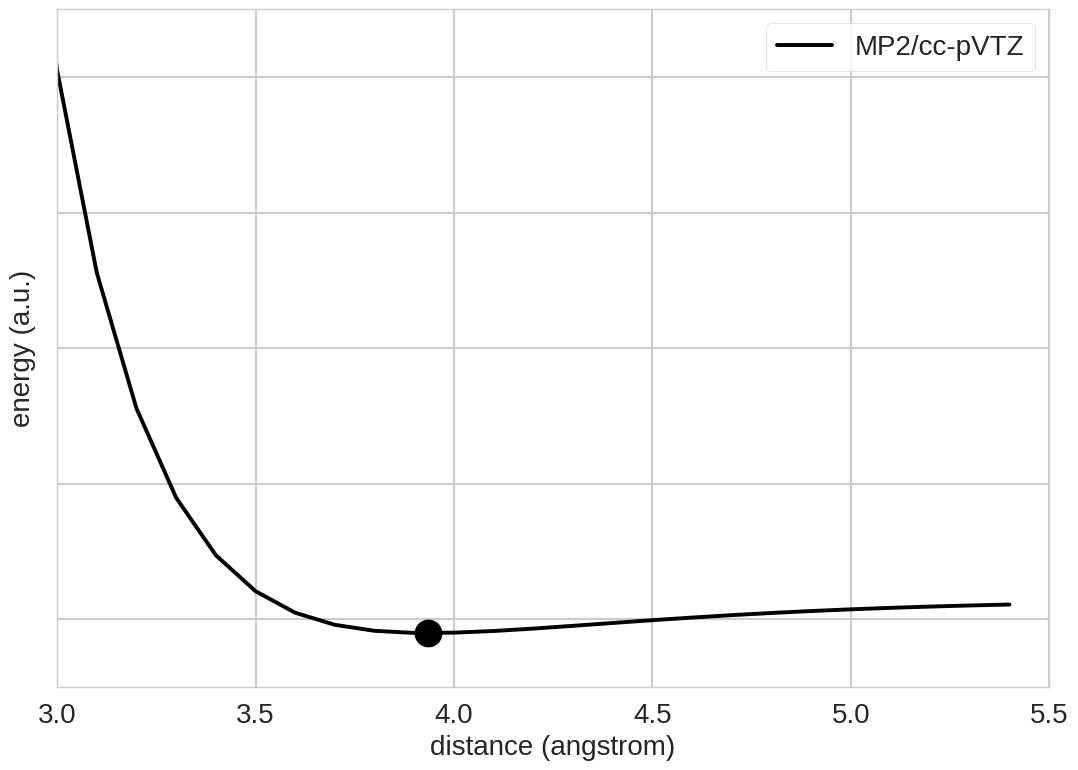

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(1.5, 5.5, 0.1), df_ar2['mp2'], 'k-', label='MP2/cc-pVTZ')
ax.plot(3.934, -1054.1021026, 'ko', ms=20)
ax.set_xlim(3.0, 5.5)
ax.set_xticks(np.arange(3, 5.6, 0.5))
ax.set_xticklabels(np.arange(3, 5.6, 0.5), fontsize=20)
ax.set_ylim(-1054.1025, -1054.0975)
ax.set_yticklabels([])
ax.set_xlabel('distance (angstrom)', size=20)
ax.set_ylabel('energy (a.u.)', size=20)
ax.legend(fontsize=20, frameon=True)

fig.savefig('Ar2_mp2_20.png', dpi=600, transparent=True)